Iris Flower Classification 

In [1]:
#importing imp libraries

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns           

In [2]:
#importing dataset

irisdataset=pd.read_csv('IRIS.csv')         

In [3]:
irisdataset.head()  #to display first 5 rows of dataset


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data checking and cleaning

In [4]:
irisdataset.info()  #to display info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
irisdataset.isnull().sum()  #to check if there is any null value in dataset


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
irisdataset.duplicated().sum()  #to check if there is any duplicate value in dataset 
#there were 3 duplicate values
irisdataset.drop_duplicates(inplace=True)  #to drop duplicate values
irisdataset.duplicated().sum()  #to check if there is any duplicate value in dataset

0

In [7]:
#there are no null values in dataset so were good
#now were going to check how many species are there?


irisdataset['species'].value_counts()  #to display all species

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

As we can see there are 50 entries for every specie 


Data Visulization part

In [8]:
irisdataset.describe()  #to display all statistical data

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

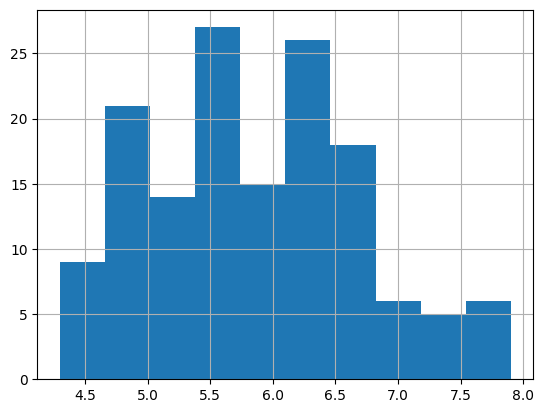

In [9]:
# histograms
irisdataset['sepal_length'].hist()      #to display histogram of sepal_length   

<Axes: >

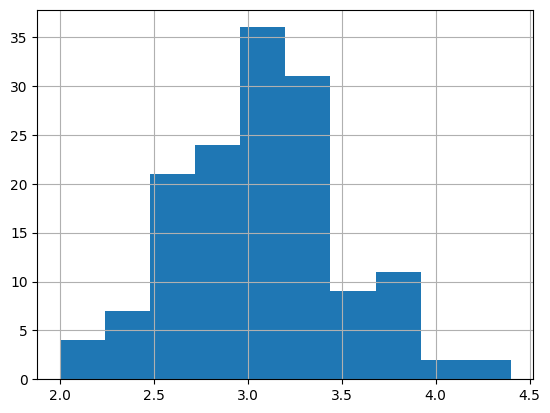

In [10]:
irisdataset['sepal_width'].hist()    #to display histogram of sepal_width


<Axes: >

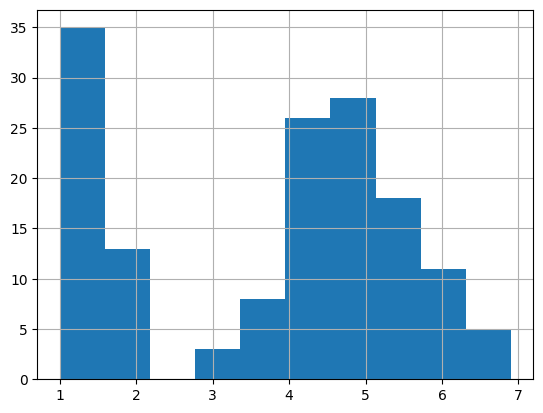

In [11]:
irisdataset['petal_length'].hist()      #to display histogram of petal_length   


<Axes: >

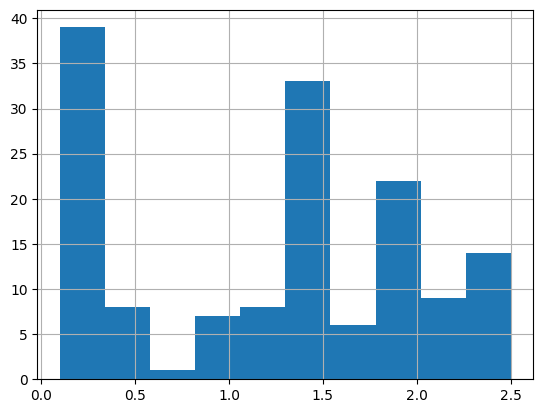

In [12]:
irisdataset['petal_width'].hist()       #to display histogram of petal_width


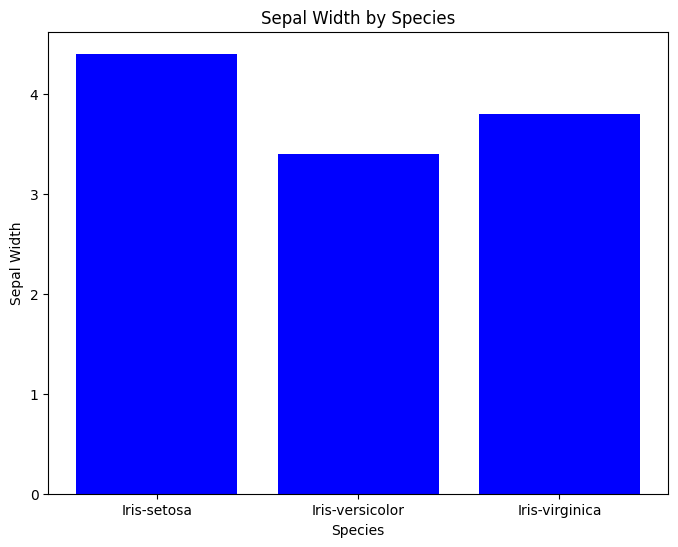

In [13]:
# Create a bar plot using matplotlib
plt.figure(figsize=(8, 6))          #to set size of graph
plt.bar(irisdataset["species"], irisdataset["sepal_width"], color="blue")           #to display bar graph

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Sepal Width")       
plt.title("Sepal Width by Species")

plt.xticks(rotation=0)  # Avoid rotating x-axis labels      

plt.show()







From this plot we can see species based on there  sepal width

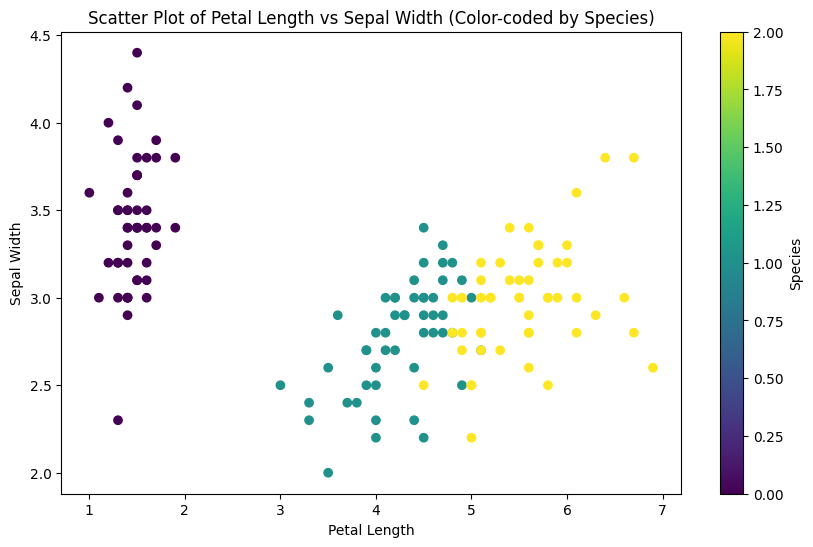

In [14]:
# Get unique species values for coloring
species_colors = pd.factorize(irisdataset["species"])[0]

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(irisdataset["petal_length"], irisdataset["sepal_width"], c=species_colors, cmap="viridis")

# Add labels and title
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot of Petal Length vs Sepal Width (Color-coded by Species)")

# Add a colorbar to show the species mapping
cbar = plt.colorbar()
cbar.set_label("Species")

plt.show()

From this graph we can visulize the species based on there petal length and there sepal width

In [15]:
# now converting categorical data into numerical data

irisdataset["species"].unique()  #to display all species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
#using 0 for iris-setosa , 1 for iris-versicolor and 2 for iris-virginica

irisdataset["species"] = irisdataset["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [17]:
irisdataset["species"].unique()  #to display all species

array([0, 1, 2], dtype=int64)

In [18]:
irisdataset.head()  #to display first 5 rows of dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Train test split

In [19]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = irisdataset.drop(columns=['species'])       
Y = irisdataset['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)       #to split dataset into train and test

In [20]:
x_train               #to display x_train

,sepal_length,sepal_width,petal_length,petal_width
69,5.6,2.5,3.9,1.1
149,5.9,3.0,5.1,1.8
121,5.6,2.8,4.9,2.0
147,6.5,3.0,5.2,2.0
30,4.8,3.1,1.6,0.2
...,...,...,...,...
67,5.8,2.7,4.1,1.0
12,4.8,3.0,1.4,0.1
133,6.3,2.8,5.1,1.5
18,5.7,3.8,1.7,0.3


In [21]:
x_test          #to display x_test      

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
52,6.9,3.1,4.9,1.5
60,5.0,2.0,3.5,1.0
57,4.9,2.4,3.3,1.0
38,4.4,3.0,1.3,0.2
90,5.5,2.6,4.4,1.2
23,5.1,3.3,1.7,0.5
17,5.1,3.5,1.4,0.3
138,6.0,3.0,4.8,1.8
85,6.0,3.4,4.5,1.6


In [22]:
y_train     #to display y_train

69     1
149    2
121    2
147    2
30     0
      ..
67     1
12     0
133    2
18     0
0      0
Name: species, Length: 102, dtype: int64

In [23]:
y_test      #to display y_test

13     0
52     1
60     1
57     1
38     0
90     1
23     0
17     0
138    2
85     1
11     0
108    2
64     1
14     0
59     1
76     1
104    2
89     1
99     1
58     1
81     1
61     1
115    2
50     1
140    2
95     1
148    2
82     1
126    2
125    2
3      0
56     1
116    2
10     0
54     1
79     1
22     0
40     0
47     0
19     0
25     0
78     1
143    2
107    2
24     0
Name: species, dtype: int64

Model Training usinf K nearest neighbor

In [24]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier      #importing KNeighborsClassifier
model = KNeighborsClassifier()                #creating object of KNeighborsClassifier

In [25]:
# model training
model.fit(x_train, y_train)         #to train model

KNeighborsClassifier()

In [26]:
from sklearn.metrics import accuracy_score  # accuracy
x_train_prediction=model.predict(x_train)   #predicting the X_train data
print(x_train_prediction)               #to display x_train_prediction


[1 2 2 2 0 1 2 2 0 1 1 2 0 1 1 0 1 2 0 2 2 1 2 1 0 2 2 0 0 1 0 0 1 2 2 0 2
 1 0 0 2 2 2 2 2 1 0 1 0 1 2 0 1 0 1 0 2 0 0 0 2 2 2 0 2 0 1 2 0 0 2 2 2 1
 1 1 2 2 0 1 2 0 2 2 1 2 0 2 0 1 1 1 0 0 1 1 2 1 0 2 0 0]


In [27]:
training_accuracy=accuracy_score(y_train,x_train_prediction)    #comparing the predicted values with the original values
print("Accuracy score of the training  data : ",training_accuracy)  #printing the accuracy score of the training data

Accuracy score of the training  data :  0.9509803921568627


95% accuracy on training data

In [28]:
# now evaluate using test data

X_test_prediction=model.predict(x_test) # predict on test data
print(X_test_prediction)             # print prediction values

[0 1 1 1 0 1 0 0 2 1 0 2 1 0 1 1 2 1 1 1 1 1 2 1 2 1 2 1 2 2 0 1 2 0 1 1 0
 0 0 0 0 1 2 2 0]


In [29]:
testing_accuracy=accuracy_score(y_test,X_test_prediction)   # accuracy of the test data
print("Accuracy score of the test  data : ",testing_accuracy)   # printing the accuracy of the test data

Accuracy score of the test  data :  1.0
